# Business Background

Transjakarta is primary public transportation that serving millions of commuters daily at Jakarta, Indonesia. The system is designed to provide a fast, comfortable, and affordable means of transportation to reduce the city's traffic congestion and reduce pollution. As part of ongoing efforts to improve service quality and operational efficiency, TransJakarta collects a wide range of data, such as amount of transaction, customer information, and bus routes.

# Business Problem
 The company aims to enhance service efficiency, optimize resource allocation, and improve customer satisfaction. Understanding the differences in customer behavior between weekdays and weekends is crucial for achieving these goals. This includes analyzing ridership patterns, peak hours, transactions, and other relevant factors.

OBJECTIVE:
Understanding customer behaviour between weekday and weekend



# Data Cleaning & Data Preparation

1. Identify the null values.
2. Identify the duplicated values.
3. Identify and fix the columns by fill it with using median/mode, drop it or replace the values     
4. Change the datatype
5. Add new columns to help for data analysis
6. Save and export to a new file after cleaning and preparing data


In [2]:
# library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('Transjakarta.csv')
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


1. Identify the null values

In [4]:
# Identify how many null values in each columns
df.isnull().sum() 

# Identify how many percentage of null in each columns
#(df.isnull().sum()/len(df))*100

# Display the targeted columns with null values
# For example is displaying null values inside the corridorID column:
null_in_corrID = df['corridorID'].isnull()
df[null_in_corrID].head(5)

# if you want to check for other column, you can create a new varible with the same formula.



,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
120,MCWO805A6Q66MX,3570416613897992,dki,"Gawati Damanik, S.E.",F,2010,NaN,NaN,0.0,P00109,...,106.86115,8,2023-04-03 06:38:44,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:11,3500.0
240,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,NaN,NaN,0.0,B04505P,...,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0
250,OLZA217B5B95DK,4371940047525876160,brizzi,Zelda Laksita,M,2009,NaN,NaN,1.0,B04576P,...,106.73786,11,2023-04-03 06:24:37,B05009P,Simpang Meruya Ilir 1,-6.196682,106.75517,28.0,2023-04-03 07:13:18,0.0
257,GHEY769K9T55WF,4281653494791,online,Zelda Wibowo,M,1989,NaN,NaN,0.0,B00048P,...,106.92867,16,2023-04-03 05:05:24,B05823P,United Tractors 1,-6.183260,106.93243,28.0,2023-04-03 05:41:12,3500.0


2. Identify the duplicated values

In [5]:
df.duplicated().sum()

# Result: There is no duplicate values inside the dataframe


0

3. Fixing the columns by fill it with using median/mode, drop it or replace the values

In [6]:
#A.the payAmount column

# Checking the null values
null_payAmount = df['payAmount'].isnull()
df[null_payAmount]

# Fill the null values using median
median_payAmount = df['payAmount'].median()
median_payAmount


df['payAmount'] = df['payAmount'].fillna(median_payAmount)
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [7]:
#B. The CorridorID & CorridorName columns

# Identify the paired null values from both columns
null_both_Corr = df[df['corridorID'].isnull() & df['corridorName'].isnull()]

# Drop the rows that both have null values on it
df =df.drop(index=null_both_Corr.index)
df

# Checking the null values in both columns
#df['corridorName'].isnull().sum()


# Replacing the null values in corridorID
# Calculate the mode for each group
mode_values_corrName = df.groupby('corridorName')['corridorID'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unidentified')

# # Define a function to fill NaN values with the mode
def fill_missing_corID(row):
   if pd.isnull(row['corridorID']):
       return mode_values_corrName[row['corridorName']]
   else:
       return row['corridorID']

# # Apply the function to the DataFrame
df['corridorID'] = df.apply(fill_missing_corID, axis=1)



# Replacing the null values in corridorName
# Calculate the mode for each group
mode_values_corrID = df.groupby('corridorID')['corridorName'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unidentified')

# # Define a function to fill NaN values with the mode
def fill_missing_corName(row):
   if pd.isnull(row['corridorName']):
       return mode_values_corrID[row['corridorID']]
   else:
      return row['corridorName']

# # Apply the function to the DataFrame
df['corridorName'] = df.apply(fill_missing_corName, axis=1)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [8]:
# C. the tapInStops column

# Identify the paired null values from tapInStops
null_tapInStops = df['tapInStops'].isnull()
df[null_tapInStops]

# Checking the null values in the columns
#df['tapInStops'].isnull().sum()


# Replacing the null values in tapInStops
# Calculate the mode for each group
mode_values_tapInsStopsName = df.groupby('tapInStopsName')['tapInStops'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unidentified')

# # Define a function to fill NaN values with the mode
def fill_missing_tapInStopsName(row):
   if pd.isnull(row['tapInStops']):
       return mode_values_tapInsStopsName[row['tapInStopsName']]
   else:
       return row['tapInStops']

# # Apply the function to the DataFrame
df['tapInStops'] = df.apply(fill_missing_tapInStopsName, axis=1)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [9]:
# D. the tapOutStops & tapOutStopsName columns
# Identify the paired null values from both columns
null_both_tapOut = df[df['tapOutStops'].isnull() & df['tapOutStopsName'].isnull()]
null_both_tapOut

#Drop the rows that both have null values on it
df =df.drop(index=null_both_tapOut.index)
df

# Checking the null values in both columns
# df['tapOutStops'].isnull().sum()


# Replacing the null values in tapOutStops
# Calculate the mode for each group
mode_values_tapOutStopsName = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unidentified')

# # Define a function to fill NaN values with the mode
def fill_missing_tapOutStops(row):
   if pd.isnull(row['tapOutStops']):
       return mode_values_tapOutStopsName[row['tapOutStopsName']]
   else:
       return row['tapOutStops']

# # Apply the function to the DataFrame
df['tapOutStops'] = df.apply(fill_missing_tapOutStops, axis=1)
df

# Checking whether there is the 'Unidentified' values
#df[df['tapOutStops'] == 'Unidentified']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [10]:
# E. the payCardSex column

df['payCardSex'] = df['payCardSex'].replace({'F': 'Female', 'M': 'Male'})
df.head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


4. Change the datatype

In [11]:
# tapInTime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# tapOutTime
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# direction
df['direction'] = df['direction'].round().astype(int)
# df

#stopEndSeq
df['stopEndSeq'] = df['stopEndSeq'].round().astype(int)
df.head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,3500.0


In [12]:
# Checking the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           35478 non-null  object        
 1   payCardID         35478 non-null  int64         
 2   payCardBank       35478 non-null  object        
 3   payCardName       35478 non-null  object        
 4   payCardSex        35478 non-null  object        
 5   payCardBirthDate  35478 non-null  int64         
 6   corridorID        35478 non-null  object        
 7   corridorName      35478 non-null  object        
 8   direction         35478 non-null  int32         
 9   tapInStops        35478 non-null  object        
 10  tapInStopsName    35478 non-null  object        
 11  tapInStopsLat     35478 non-null  float64       
 12  tapInStopsLon     35478 non-null  float64       
 13  stopStartSeq      35478 non-null  int64         
 14  tapInTime         35478 non

5. Add new columns to help for data analysis

In [13]:
# Add Age column
age_now = datetime.now().year
df['age'] = age_now - df['payCardBirthDate']
index = df.columns.get_loc('payCardBirthDate') + 1
df.insert(index, 'age', df.pop('age'))

# Add Travel duration column
df['travelDuration_inMinutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
df['travelDuration_inMinutes'] = df['travelDuration_inMinutes'].round().astype(int)
index = df.columns.get_loc('tapOutTime') + 1
df.insert(index, 'travelDuration_inMinutes', df.pop('travelDuration_inMinutes'))
df.head(5)

# Add Day column
df['Day'] = df['tapInTime'].dt.day_name()
index = df.columns.get_loc('tapOutTime') + 1
df.insert(index, 'Day', df.pop('Day'))
df.head(5)

# Add IsWeekend column
df['IsWeekend'] = df['tapInTime'].dt.weekday >= 5
df['IsWeekend'] = df['IsWeekend'].apply(lambda x: 'Yes' if x else 'No')
index = df.columns.get_loc('Day') + 1
df.insert(index, 'IsWeekend', df.pop('IsWeekend'))
df.head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,age,corridorID,corridorName,direction,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,Day,IsWeekend,travelDuration_inMinutes,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,16,5,Matraman Baru - Ancol,1,...,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,Monday,No,39,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,27,6C,Stasiun Tebet - Karet via Patra Kuningan,0,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,Monday,No,57,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,32,R1A,Pantai Maju - Kota,0,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,Monday,No,52,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,46,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,Monday,No,43,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,42,12,Tanjung Priok - Pluit,0,...,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,Monday,No,39,3500.0


6. Save and export to a new file after cleaning and preparing data

In [14]:
df.to_csv('FinalFile_transjakarta.csv', index=False)

# Data Analysis

OBJECTIVE: Understanding customer behaviour on the weekdays and weekends

Rerun the updated data

In [15]:
dfnew = pd.read_csv('FinalFile_transjakarta.csv')
dfnew.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,age,corridorID,corridorName,direction,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,Day,IsWeekend,travelDuration_inMinutes,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,16,5,Matraman Baru - Ancol,1,...,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,Monday,No,39,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,27,6C,Stasiun Tebet - Karet via Patra Kuningan,0,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,Monday,No,57,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,32,R1A,Pantai Maju - Kota,0,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,Monday,No,52,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,46,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,Monday,No,43,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,42,12,Tanjung Priok - Pluit,0,...,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,Monday,No,39,3500.0


In [16]:
dfnew.describe()

,payCardID,payCardBirthDate,age,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,travelDuration_inMinutes,payAmount
count,3.547800e+04,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000
mean,4.233600e+17,1990.138706,33.861294,0.500620,-6.214865,106.841544,13.543548,-6.214660,106.841230,21.196883,72.188483,2728.705113
std,1.319496e+18,13.034972,13.034972,0.500007,0.057870,0.060396,12.200316,0.059025,0.061045,13.786118,28.062424,4173.183479
min,6.040368e+10,1946.000000,12.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,15.000000,0.000000
25%,1.800407e+14,1982.000000,23.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801640,11.000000,51.000000,0.000000
50%,3.507503e+15,1990.000000,34.000000,1.000000,-6.214587,106.834830,10.000000,-6.214787,106.834580,18.000000,72.000000,3500.000000
75%,4.693230e+15,2001.000000,42.000000,1.000000,-6.175528,106.882620,19.000000,-6.174736,106.883400,29.000000,96.000000,3500.000000
max,4.997694e+18,2012.000000,78.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,179.000000,20000.000000


Create variables for filtering data between weekday and weekend

In [17]:
weekday_data = dfnew[dfnew['IsWeekend'] == 'No']
weekend_data = dfnew[dfnew['IsWeekend'] == 'Yes']

weekend_data.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,age,corridorID,corridorName,direction,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,Day,IsWeekend,travelDuration_inMinutes,payAmount
29945,TLQN677B2R72GC,6539040209758344,dki,"Puti Febi Sitorus, M.TI.",Male,1999,25,D32,Cinere - Bundaran Senayan,0,...,B05544P,Summitmas,-6.225826,106.80402,13,2023-04-09 09:01:48,Sunday,Yes,30,20000.0
29946,JIKO719N7T59IC,3555797726624178,dki,Jelita Suwarno,Male,1995,29,JAK.19,Pinang Ranti - Kampung Rambutan,1,...,B01689P,Jln. Tpa II,-6.296656,106.89723,43,2023-04-09 11:44:56,Sunday,Yes,23,0.0
29947,UWSC273O6L35YH,2250309611886654,dki,Niyaga Wacana,Male,1970,54,2,Pulo Gadung - Monas,0,...,P00061,Galur,-6.174388,106.85485,10,2023-04-09 19:30:05,Sunday,Yes,86,3500.0
29948,USYZ299J0F00CJ,3598871005576489,dki,"R.M. Rizki Utama, S.IP",Female,2007,17,JAK.13,Tanah Abang - Jembatan Lima,0,...,B04421P,Sbr. SMAN 19,-6.141574,106.80894,36,2023-04-09 10:36:41,Sunday,Yes,89,0.0
29949,EFVF578E0R24WU,4580278479854954,dki,Luluh Astuti,Male,1992,32,1A,Pantai Maju - Balai Kota,1,...,B01328P,Jln. Lotus Indah,-6.116215,106.76534,24,2023-04-08 06:55:34,Saturday,Yes,41,3500.0


Analysing distribution for transaction, popular route, travel duration, and customer demography on the weekday and the weekend

TRANSACTION

In [18]:
# Amount of transaction between Weekday and Weekend
transaction_counts = dfnew['IsWeekend'].value_counts().reset_index()
transaction_counts.columns = ['IsWeekend', 'count']
transaction_counts

,IsWeekend,count
0,No,32014
1,Yes,3464


Amount of transaction on the weekdays is bigger (32014) than amount of transaction on the weekends

C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\3008090390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsWeekend', y='count', data=transaction_counts, palette=['yellow', 'purple'])


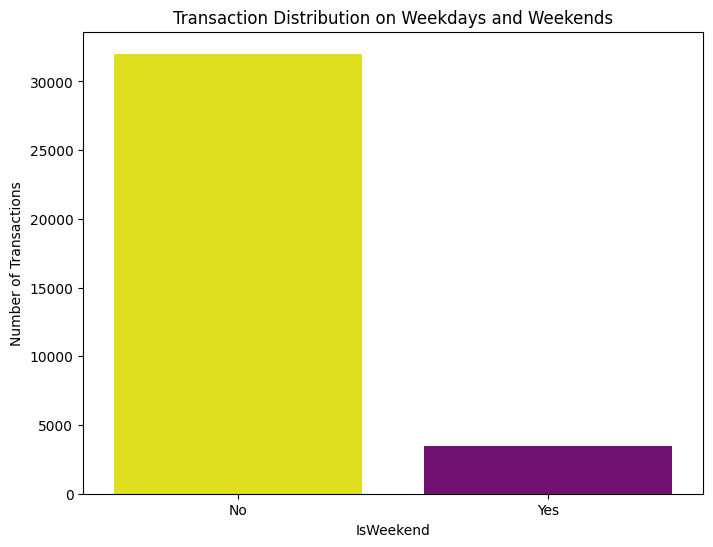

In [19]:
# Create a bar plot for the transaction distribution on weekdays and weekends
plt.figure(figsize=(8, 6))
sns.barplot(x='IsWeekend', y='count', data=transaction_counts, palette=['yellow', 'purple'])
plt.title('Transaction Distribution on Weekdays and Weekends')
plt.xlabel('IsWeekend')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [20]:
# Total Transaction Weekday
weekday_totalTransaction = weekday_data.agg({
    'transID':'count',
    'payAmount': 'sum'
})
print(f'Total transaction on the Weekday:\n {weekday_totalTransaction}')


# Total Transaction Weekend
weekend_totalTransaction = weekend_data.agg({
    'transID':'count',
    'payAmount': 'sum'
})
print(f'Total transaction on the Weekend:\n {weekend_totalTransaction}')

Total transaction on the Weekday:
 transID         32014.0
payAmount    87897000.0
dtype: float64
Total transaction on the Weekend:
 transID         3464.0
payAmount    8912000.0
dtype: float64


In [21]:
# Average daily transaction on Weekday and Weekend

avg_weekdayTransaction = weekday_data['transID'].count().mean()
avg_weekendTransaction = weekend_data['transID'].count().mean()

print(f"Average Weekday Transactions: {avg_weekdayTransaction:.2f}")
print(f"Average Weekend Transactions: {avg_weekendTransaction:.2f}")


# Average revenue on Weekday and Weekend
avg_weekdayRevenue = weekday_data['payAmount'].sum().mean()
avg_weekendRevenue = weekend_data['payAmount'].sum().mean()

print(f"Average Weekday Revenue: ${avg_weekdayRevenue:.2f}")
print(f"Average Weekend Revenue: ${avg_weekendRevenue:.2f}")

Average Weekday Transactions: 32014.00
Average Weekend Transactions: 3464.00
Average Weekday Revenue: $87897000.00
Average Weekend Revenue: $8912000.00


Description:
From the transaction analysis above, we can see that the total amount of transactions on the weekdays is bigger than the transaction on the weekends. This lead to the fact that the weekdays also generate more income than the weekends.

POPULAR ROUTE

In [22]:
# Top 10 Route people tend to use

top10_route = dfnew['corridorName'].value_counts().reset_index().head(10)
top10_route


,corridorName,count
0,Cibubur - Balai Kota,384
1,Ciputat - CSW,376
2,Pulo Gadung - Monas,333
3,Harmoni - Jakarta International Stadium,333
4,Kampung Rambutan - Pondok Gede,327
5,Kalideres - Bundaran HI via Veteran,323
6,Rusun Pondok Bambu - Walikota Jakarta Timur,323
7,Kebayoran Lama - Tanah Abang,321
8,Rusun Rawa Bebek - Kodamar,307
9,Pasar Minggu - Tanah Abang,300


384 people tend to use Cibubur-Balai Kota bus corridor

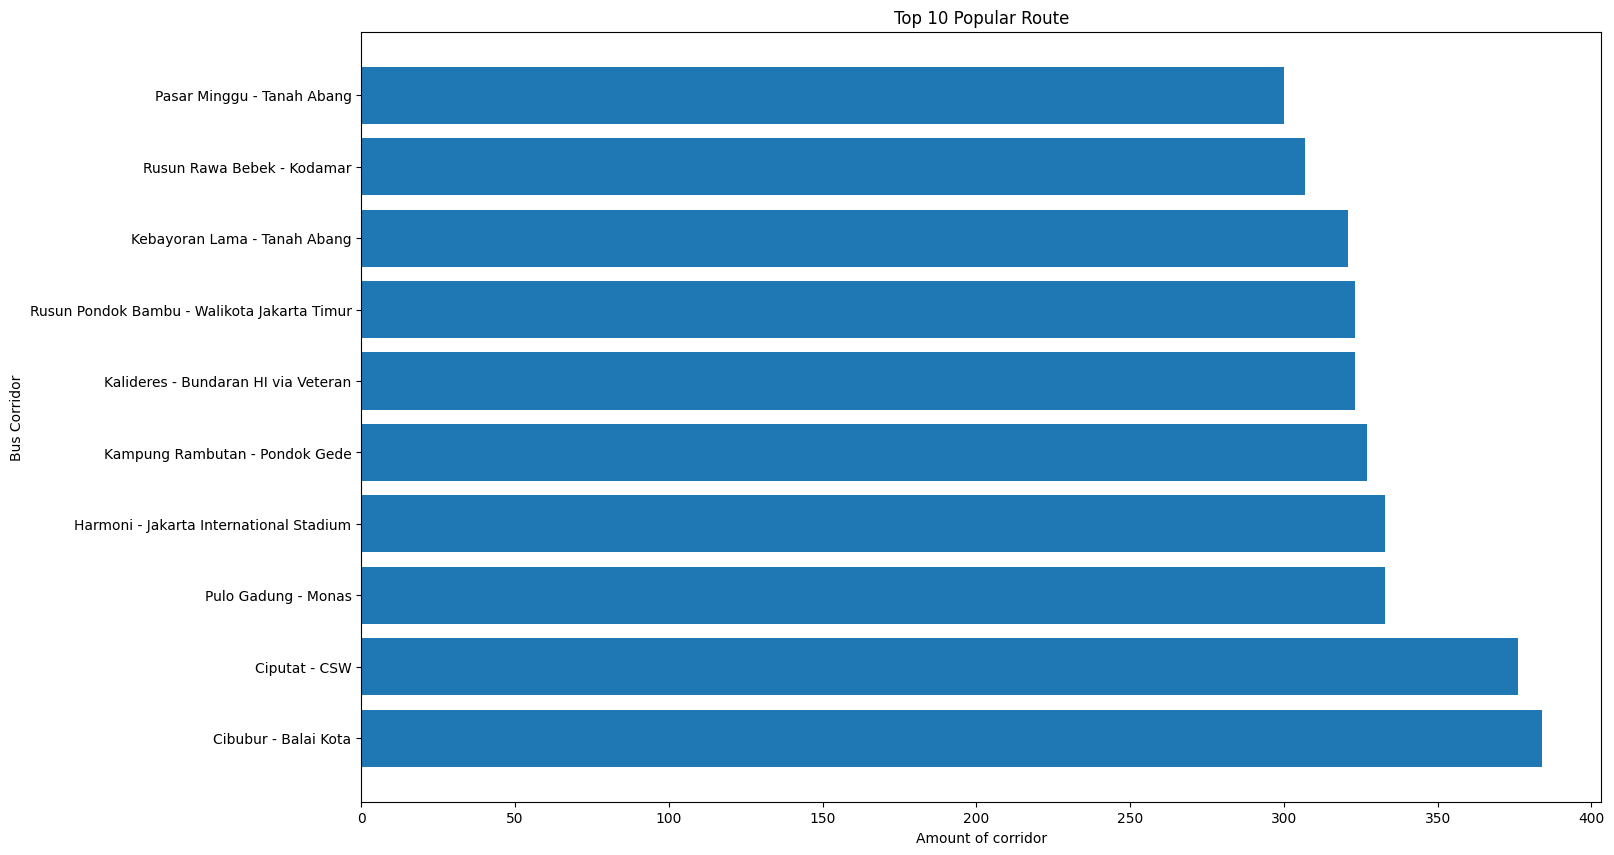

In [23]:
plt.figure(figsize=(16,10))
plt.barh(y='corridorName',width='count', data=top10_route)
plt.title('Top 10 Popular Route')
plt.xlabel('Amount of corridor')
plt.ylabel('Bus Corridor')
plt.show()

In [24]:
weekday_route = weekday_data['corridorName'].value_counts().reset_index()
weekend_route = weekend_data['corridorName'].value_counts().reset_index()


C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\4099914481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='corridorName', data=weekday_route.head(5), palette='viridis')


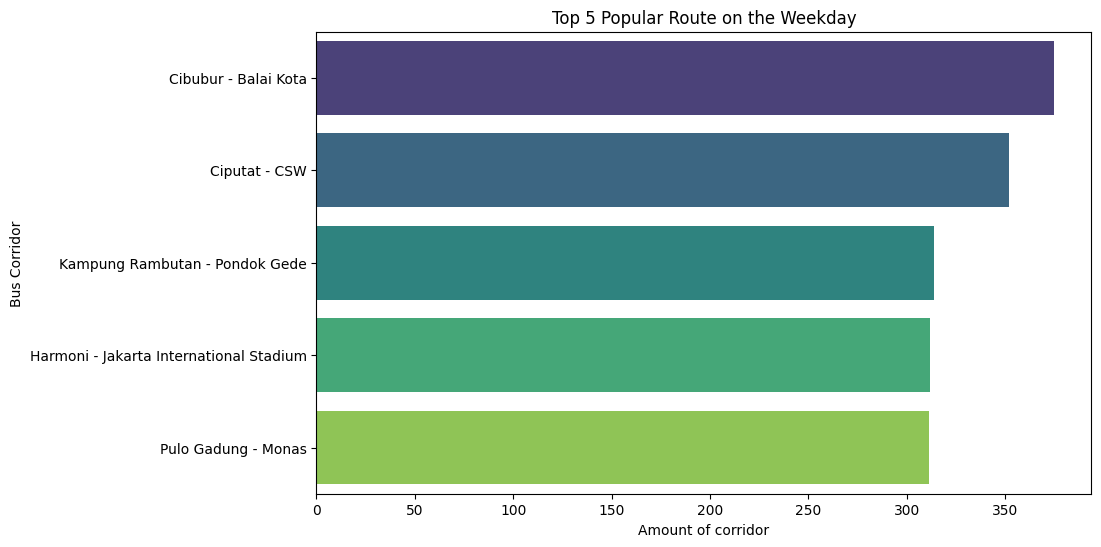

In [25]:
# Top 5 Route on the Weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='corridorName', data=weekday_route.head(5), palette='viridis')
plt.title('Top 5 Popular Route on the Weekday')
plt.xlabel('Amount of corridor')
plt.ylabel('Bus Corridor')

plt.show()

Description:
The most popular route on the Weekday (Cibubur - Balai Kota) is #1 in the top 10 popular route.
This popular route  which is called bus corridor 1T is part of the Royaltrans service routes. This Royaltrans service route has several bus destinations that passenger can choose from if they want to travel around Jakarta and its surroundings.

C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\3164576712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='corridorName', data=weekend_route.head(5), palette='viridis')


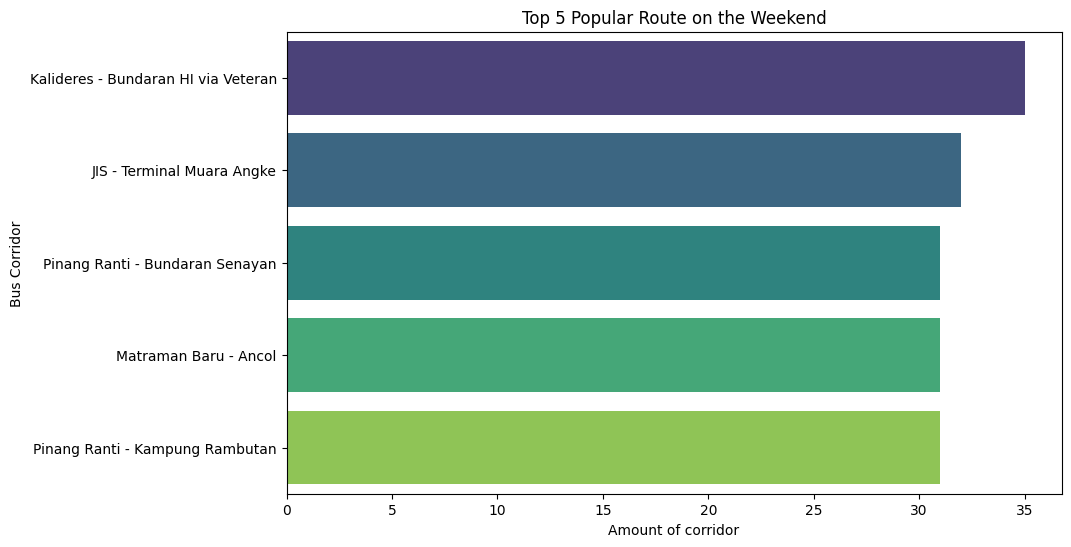

In [26]:
# Top 5 Route on the Weekend
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='corridorName', data=weekend_route.head(5), palette='viridis')
plt.title('Top 5 Popular Route on the Weekend')
plt.xlabel('Amount of corridor')
plt.ylabel('Bus Corridor')

plt.show()

Description:
The most popular route on the Weekends (Kalideres - Bundaran HI via Veteran) is #6 in the top 10 popular route.
This bus are regular BRT buses that serve from the Kalideres bus stop to the National Monument via Veteran. This bus route connects roads from West Jakarta and Central Jakarta.

TRAVEL DURATION

In [27]:
avg_weekday_duration = weekday_data['travelDuration_inMinutes'].mean().__round__()
avg_weekend_duration = weekend_data['travelDuration_inMinutes'].mean().__round__()

print(f"Average travel duration on the Weekday: {avg_weekday_duration:} minutes")
print(f"Average ravel duration on the Weekend: {avg_weekend_duration:} minutes")

Average travel duration on the Weekday: 72 minutes
Average ravel duration on the Weekend: 71 minutes


In [28]:
# Travel duration of top 5 corridor on the Weekday
top5_weekdayRoute = weekday_data['corridorName'].value_counts().reset_index().head(5)

avg_corrDur_weekday = weekday_data.groupby('corridorName')['travelDuration_inMinutes'].mean().reset_index()

top5_weekdayRoute_Duration = pd.merge(top5_weekdayRoute, avg_corrDur_weekday,on='corridorName')

top5_weekdayRoute_Duration


,corridorName,count,travelDuration_inMinutes
0,Cibubur - Balai Kota,375,72.146667
1,Ciputat - CSW,352,76.264205
2,Kampung Rambutan - Pondok Gede,314,72.159236
3,Harmoni - Jakarta International Stadium,312,72.448718
4,Pulo Gadung - Monas,311,71.781350


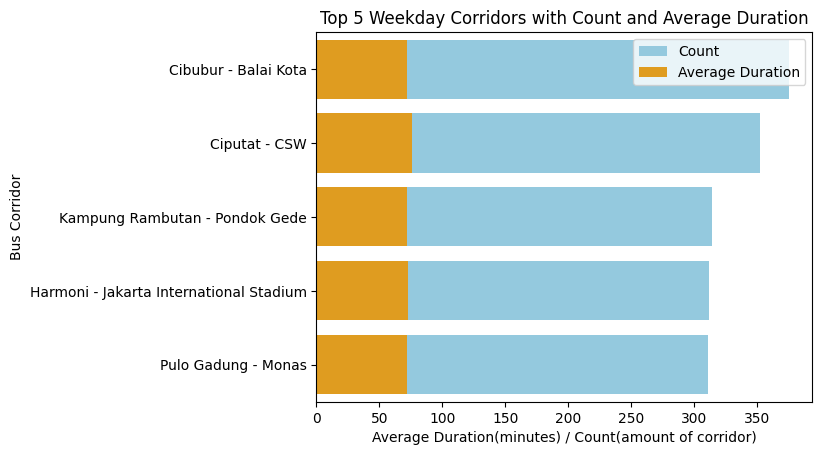

In [29]:
# Plot barplot for top 5 weekday Bus corridors average duration and route
sns.barplot(x='count', y='corridorName', data=top5_weekdayRoute_Duration, color='skyblue', label='Count')
sns.barplot(x='travelDuration_inMinutes', y='corridorName', data=top5_weekdayRoute_Duration, color='orange', label='Average Duration')
plt.title('Top 5 Weekday Corridors with Count and Average Duration')
plt.xlabel('Average Duration(minutes) / Count(amount of corridor)')
plt.ylabel('Bus Corridor')
plt.legend()

In [30]:
# Travel duration of top 5 corridor on the Weekend
top5_weekendRoute = weekend_data['corridorName'].value_counts().reset_index().head(5)

avg_corrDur_weekend = weekend_data.groupby('corridorName')['travelDuration_inMinutes'].mean().reset_index()

top5_weekendRoute_Duration = pd.merge(top5_weekendRoute, avg_corrDur_weekend,on='corridorName')

top5_weekendRoute_Duration


,corridorName,count,travelDuration_inMinutes
0,Kalideres - Bundaran HI via Veteran,35,69.800000
1,JIS - Terminal Muara Angke,32,75.156250
2,Pinang Ranti - Bundaran Senayan,31,85.741935
3,Matraman Baru - Ancol,31,55.741935
4,Pinang Ranti - Kampung Rambutan,31,68.903226


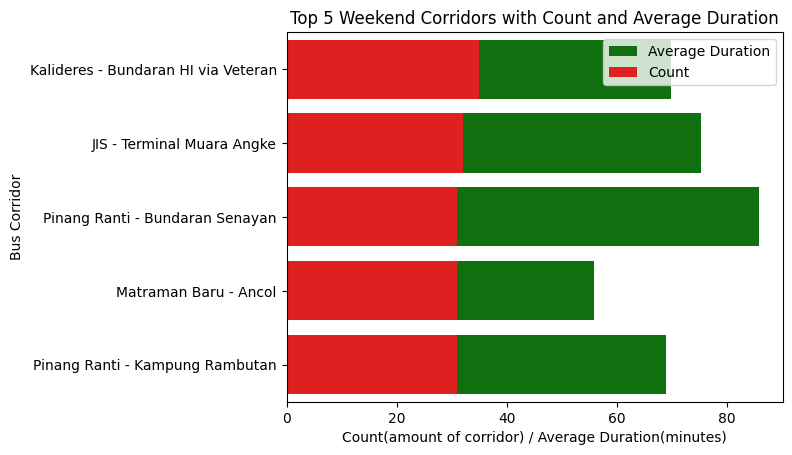

In [31]:
# Plot barplot for top 5 weekend Bus corridors average duration and route
sns.barplot(x='travelDuration_inMinutes', y='corridorName', data=top5_weekendRoute_Duration, color='green', label='Average Duration')
sns.barplot(x='count', y='corridorName', data=top5_weekendRoute_Duration, color='red', label='Count')
plt.title('Top 5 Weekend Corridors with Count and Average Duration')
plt.xlabel('Count(amount of corridor) / Average Duration(minutes)')
plt.ylabel('Bus Corridor')
plt.legend()

Description: The average amount of travel duration of top 5 bus corridor on the weekdays is 72.6 minutes with range amount of people who take the bus is around 350 people. For the weekend, the travel duration is 71.4 minutes with range amount of people who take the bus is around 30 people.

CUSTOMER DEMOGRAPHIC


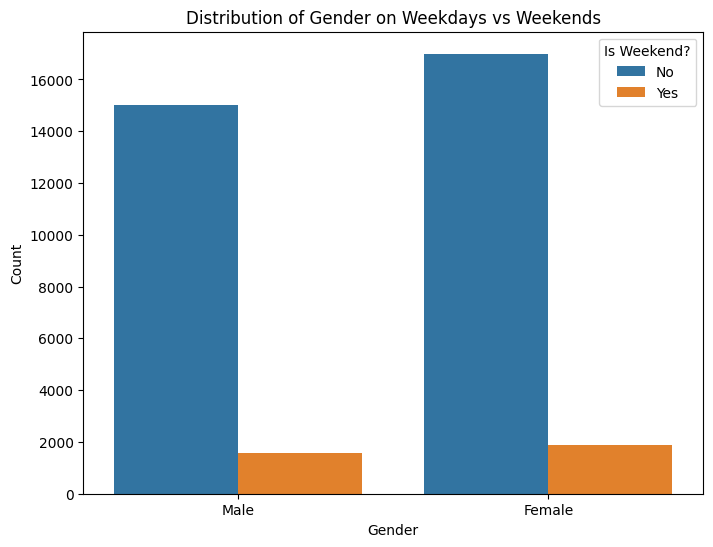

In [32]:
# Plotting gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dfnew, x='payCardSex', hue='IsWeekend')
plt.title('Distribution of Gender on Weekdays vs Weekends')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Weekend?')
plt.show()

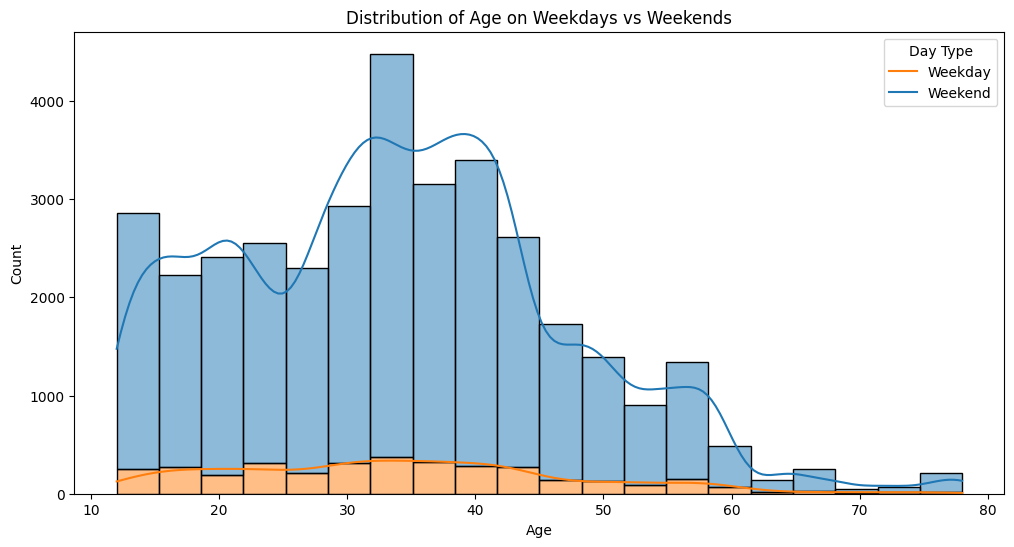

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfnew, x='age', hue='IsWeekend', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Age on Weekdays vs Weekends')
plt.xlabel('Age')
plt.ylabel('Count')

# Update legend settings
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.show()

In [34]:
avg_weekday_age = weekday_data['age'].mean()
avg_weekend_age = weekend_data['age'].mean()

weekday_gender_dist = round(weekday_data['payCardSex'].value_counts(normalize=True) * 100)
weekend_gender_dist = round(weekend_data['payCardSex'].value_counts(normalize=True) * 100)

print(f"Average passenger age on the weekday: {avg_weekday_age:.2f} years")
print(f"Average passenger age on the weekend: {avg_weekend_age:.2f} years")

print(f"Weekday Gender Distribution:\n{weekday_gender_dist}")
print(f"Weekend Gender Distribution:\n{weekend_gender_dist}")

Average passenger age on the weekday: 33.84 years
Average passenger age on the weekend: 34.03 years
Weekday Gender Distribution:
payCardSex
Female    53.0
Male      47.0
Name: proportion, dtype: float64
Weekend Gender Distribution:
payCardSex
Female    54.0
Male      46.0
Name: proportion, dtype: float64


Description:
From the data gathered, we can see that percentage of female passenger is bigger than  male passenger whether on the weekdays or weekends with average age 34 years old for both gender.

PEAK HOUR

In [35]:
weekday_data['tapInTime'] = pd.to_datetime(weekday_data['tapInTime'])
weekend_data['tapInTime'] = pd.to_datetime(weekend_data['tapInTime'])

weekday_data['tapOutTime'] = pd.to_datetime(weekday_data['tapOutTime'])
weekend_data['tapOutTime'] = pd.to_datetime(weekend_data['tapOutTime'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\3582396934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data['tapInTime'] = pd.to_datetime(weekday_data['tapInTime'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\3582396934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['tapInTime'] = pd.to_datetime(weekend_data['tapInTime'])
C:\Users\ACER\AppData\Local\Temp\ipykernel_9220\3582396934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [36]:
Hourly_weekday = weekday_data.groupby(weekday_data['tapInTime'].dt.hour)['transID'].size().reset_index(name='Amount of Transactions')
Hourly_weekend = weekend_data.groupby(weekend_data['tapInTime'].dt.hour)['transID'].size().reset_index(name='Amount of Transactions')

Hourly_weekend.head(5)

,tapInTime,Amount of Transactions
0,5,211
1,6,190
2,7,196
3,8,227
4,9,194


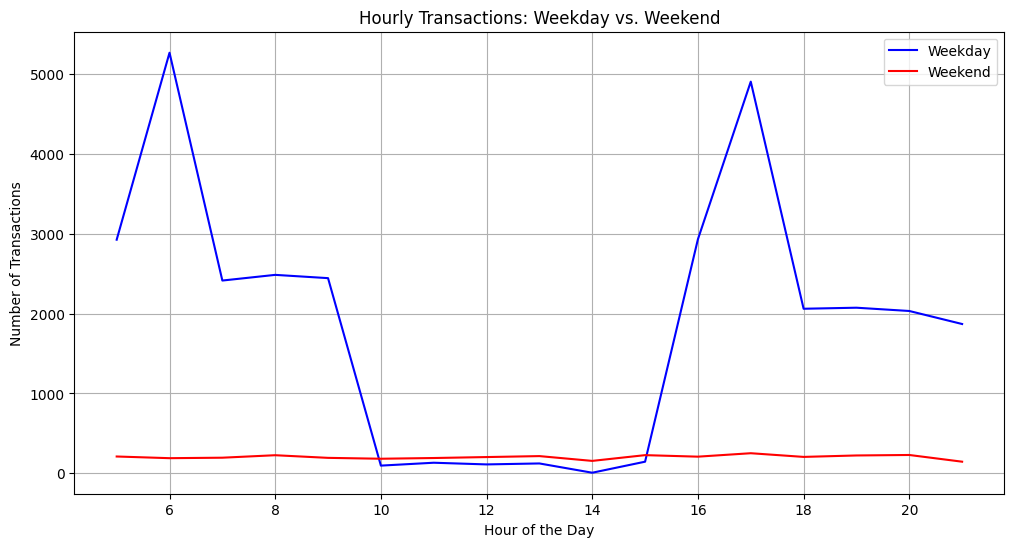

In [37]:
plt.figure(figsize=(12, 6))

plt.plot(Hourly_weekday['tapInTime'], Hourly_weekday['Amount of Transactions'], label='Weekday', color='blue')
plt.plot(Hourly_weekend['tapInTime'], Hourly_weekend['Amount of Transactions'], label='Weekend', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transactions: Weekday vs. Weekend')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# PEAK HOUR BASED ON THE BUS STOP
#TAP-IN

grouped_tapIn_weekday = weekday_data.groupby(['tapInStopsName', weekday_data['tapInTime'].dt.hour]).size().reset_index(name='amount_transaction')
grouped_tapIn_weekday.sort_values(by='amount_transaction', ascending=False)

top5_popular_TapIn_weekday = grouped_tapIn_weekday.sort_values(by='amount_transaction', ascending=False).head(5)
top5_popular_TapIn_weekday

# Result:
# most tapIn happens in Garuda Taman Mini with 49 transactions at 5 PM

,tapInStopsName,tapInTime,amount_transaction
922,Garuda Taman Mini,6,47
3436,Penjaringan,17,47
584,Cibubur Junction,17,40
127,BKN,17,38
157,BNN LRT,17,35


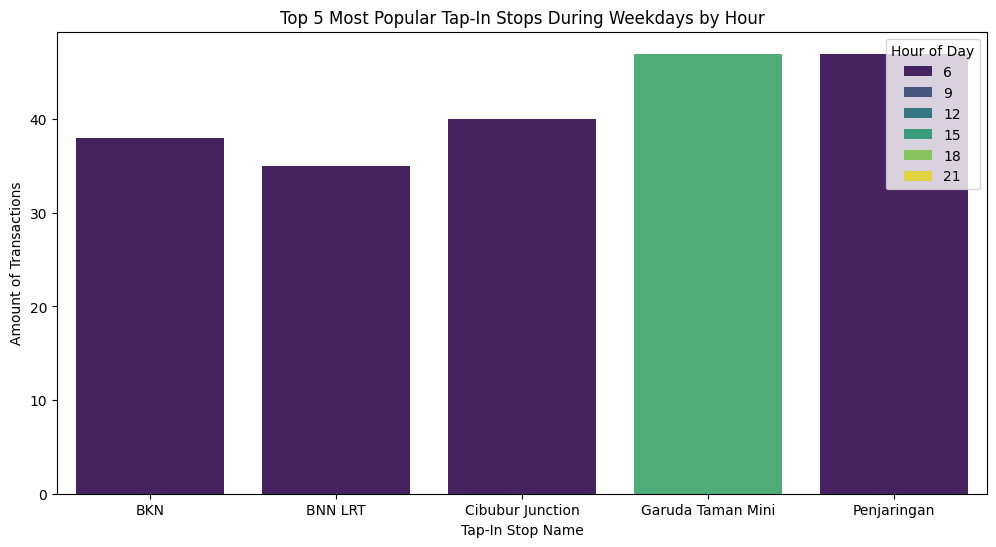

In [39]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_popular_TapIn_weekday, x='tapInStopsName', y='amount_transaction', hue=weekday_data['tapInTime'].dt.hour, palette='viridis')
plt.title('Top 5 Most Popular Tap-In Stops During Weekdays by Hour')
plt.xlabel('Tap-In Stop Name')
plt.ylabel('Amount of Transactions')
plt.legend(title='Hour of Day')
plt.show()

In [40]:
grouped_tapIn_weekend = weekend_data.groupby(['tapInStopsName', weekend_data['tapInTime'].dt.hour]).size().reset_index(name='amount_transaction')
grouped_tapIn_weekend.sort_values(by='amount_transaction', ascending=False)

top5_popular_TapIn_Weekend = grouped_tapIn_weekend.sort_values(by='amount_transaction', ascending=False).head(5)
top5_popular_TapIn_Weekend

,tapInStopsName,tapInTime,amount_transaction
765,Jembatan Merah,20,3
81,BNN Arah Barat,18,3
1631,Pasar Genjing,5,3
371,Dittopad 2,10,3
373,Dukuh Atas,7,3


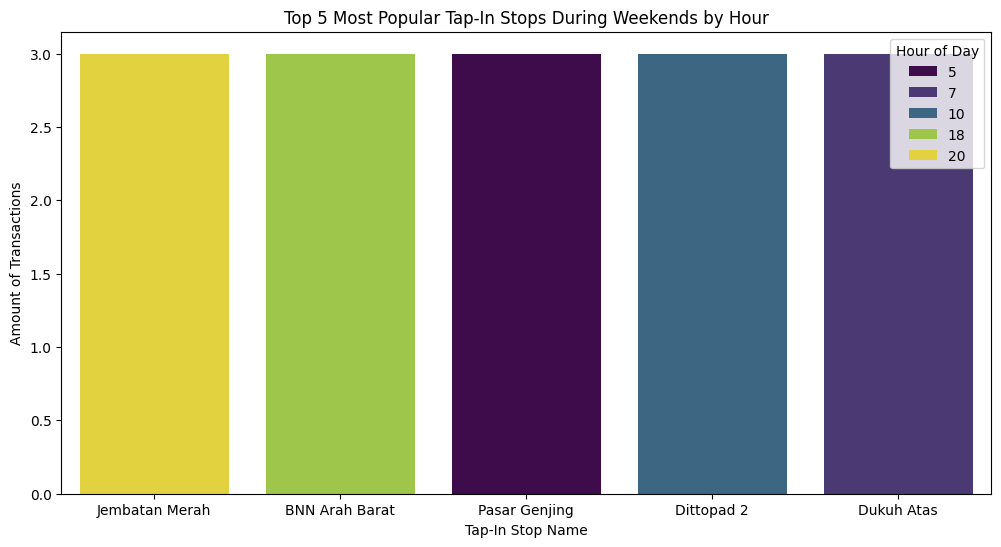

In [41]:
# Weekend
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_popular_TapIn_Weekend, x='tapInStopsName', y='amount_transaction', hue='tapInTime', palette='viridis')
plt.title('Top 5 Most Popular Tap-In Stops During Weekends by Hour')
plt.xlabel('Tap-In Stop Name')
plt.ylabel('Amount of Transactions')
plt.legend(title='Hour of Day')
plt.show()

Description:

As we can see on the graph titled 'Hourly Transactions: Weekday vs. Weekend', the significant spiky line pointed out that peak hour happened at 6 AM and in-between 4 PM to 6 PM on the weekday, while on the weekend there is no significant spiky line. As an example, we can take a look at 'Top 5 Most Popular Tap-In Stops During Weekends by Hour' table that shows the highest amount transaction that happen on the bus stop are all the same which is 3. 


# Conclusion

From the analysis above, I found that the passengers tend to take a Transjakarta bus frequently on the weekdays rather than on the weekends. This statement also supported by the amount of transactions registered from the data which related directly to the registered passenger.
As mentioned that the most popular route on the Weekday is 1T (Cibubur - Balai Kota), which become a route for employees (might have range age around 30s years old) that work around center city as I might assumes. As a lot of employees in Jakarta use public transportation rather than their own to avoid traffic.
For the passenger that tend to use bus on the weekends, it might be of they want to go to the city for holiday. This based on the graph of 'the most popular route on the Weekends' which is Kalideres - Bundaran HI via Veteran.This bus route connects roads from West Jakarta and Central Jakarta.

In conlcusion, Transjakarta is frequently used by people on the weekdays, mostly for daily activity such as go to work, school,or any important weekdays activities. Thus, Transjakarta also gain a lot more income on the weekdays than weekends.

